## Import libraries

In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

## Import data

In [231]:
df_orders = pd.read_excel('orders.xlsx', sheet_name='superstore_orders')
df_returns = pd.read_excel('returns.xlsx', sheet_name='superstore_returns')

## orders.xlsx

In [232]:
df_orders.head(5)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## returns.xlsx

In [235]:
df_returns.head(5)
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


## Analysis of sales and returns

In [280]:
# Data merging 
merged_df = pd.merge(df_orders, df_returns, on='Order ID', how='left')
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,NaN


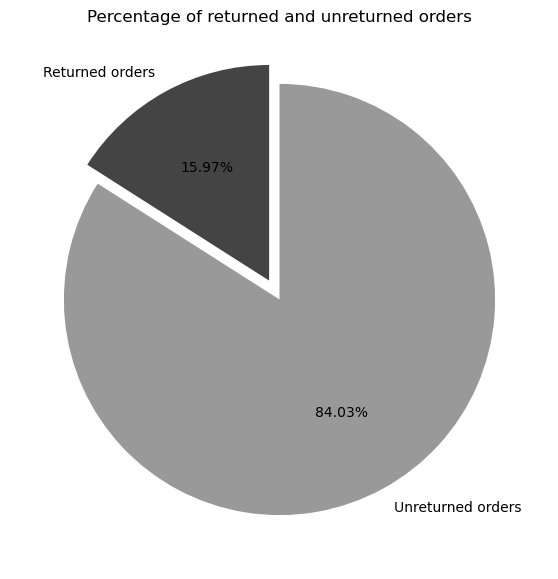

In [287]:
# Calculation of percentage of orders returned
orders_total = merged_df['Order ID'].nunique()
merged_df['Returned'] = merged_df['Returned'].replace({'Yes': 1, pd.NA: 0})
returned_total = merged_df['Returned'].sum()

returned_share = round((returned_total / orders_total) * 100,2)
not_returned_share = 100 - returned_share

# Preparing data for the chart
labels = ['Returned orders', 'Unreturned orders']
sizes = [returned_share, not_returned_share]
colors = ['#444444','#999999']
explode = (0.1, 0)

# Creating a pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, explode=explode)
plt.title('Percentage of returned and unreturned orders')
plt.show()


## Impact of refunds on revenue

In [301]:
# Calculation of revenue before refunds
total_sales = df_orders['Sales'].sum()
merged_df['Returned'] = merged_df['Returned'].fillna(False)
returned_sales = merged_df.loc[merged_df['Returned'], 'Sales'].sum()
returned_sales_percentage = round((returned_sales / total_sales * 100),2)

print(f'Total sales: {total_sales:.2f} USD')
print(f'Value of revenue generated by returns: {returned_sales} USD ({returned_sales_percentage}%)')
print(100 * '-')

# Categories with the highest proportion of returns
returned_category = merged_df.groupby('Category')['Returned'].mean().sort_values(ascending=False) * 100
print(returned_category)

Total sales: 2297200.86 USD
Value of revenue generated by returns: 2994012.24 USD (130.33%)
----------------------------------------------------------------------------------------------------
Category
Technology         8.446129
Furniture          8.062235
Office Supplies     7.84932
Name: Returned, dtype: object


## Regions and segments with the highest number of returns

C:\Users\marty\AppData\Local\Temp\ipykernel_21528\2593191182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_returns.index, y=region_returns.values, palette='Set2')


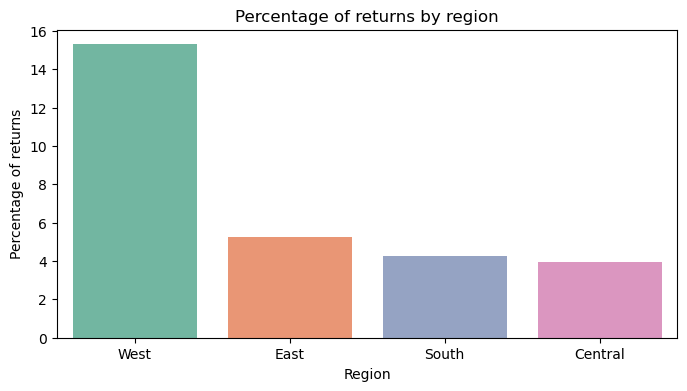

C:\Users\marty\AppData\Local\Temp\ipykernel_21528\2593191182.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_returns.index, y=segment_returns.values, palette='Blues_r')


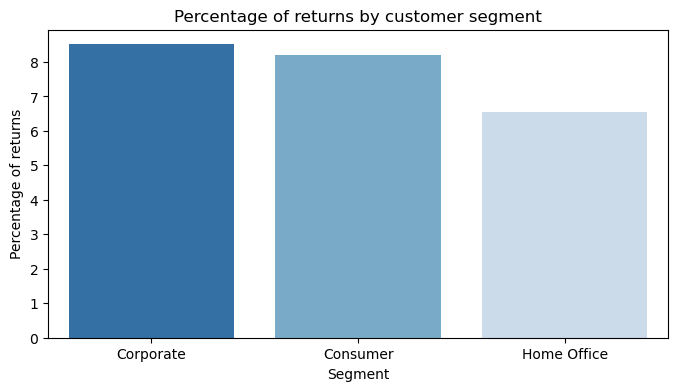

In [299]:
region_returns = merged_df.groupby('Region')['Returned'].mean().sort_values(ascending=False) * 100
segment_returns = merged_df.groupby('Segment')['Returned'].mean().sort_values(ascending=False) * 100

# Visualisation of returns per region
plt.figure(figsize=(8,4))
sns.barplot(x=region_returns.index, y=region_returns.values, palette='Set2')
plt.title('Percentage of returns by region')
plt.ylabel('Percentage of returns')
plt.show()

# Visualisation of returns per segment
plt.figure(figsize=(8, 4))
sns.barplot(x=segment_returns.index, y=segment_returns.values, palette='Blues_r')
plt.title('Percentage of returns by customer segment')
plt.ylabel('Percentage of returns')
plt.show()

## Seasonality of sales and returns

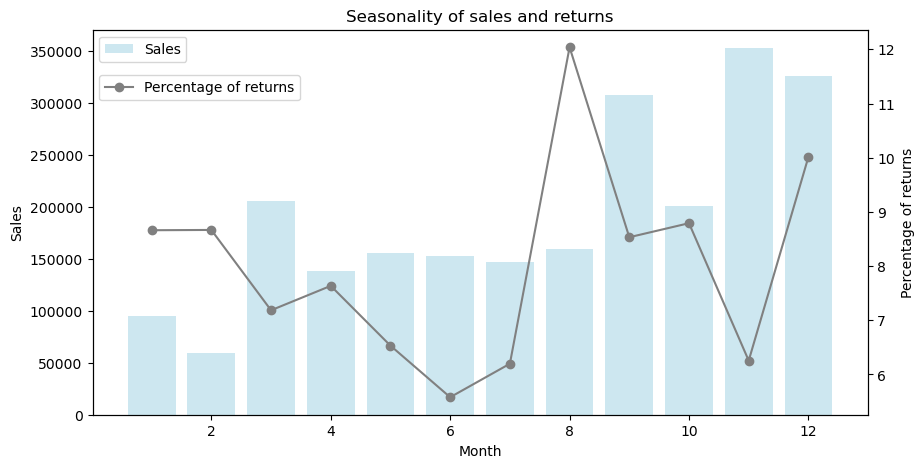

In [297]:
df_orders['Month'] = df_orders['Order Date'].dt.month
monthly_returns = merged_df.groupby('Month')['Returned'].mean() * 100
monthly_sales = merged_df.groupby('Month')['Sales'].sum()

# Seasonality chart of returns and sales
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.bar(monthly_sales.index, monthly_sales.values, color='lightblue', alpha=0.6, label='Sales')
ax2.plot(monthly_returns.index, monthly_returns.values, color='gray', marker='o', label='Percentage of returns')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Percentage of returns')
plt.title('Seasonality of sales and returns')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
plt.show()